In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import learning_curve


In [8]:
y = np.load('/content/drive/MyDrive/hw1/y.npy')
x = np.load('/content/drive/MyDrive/hw1/x.npy')
print(x)
print(y)

[[-2.28087808  1.40445145 -0.99437421 ... -1.36477942 -1.37765935
   1.00076637]
 [ 0.53550748  0.61497875  0.04821114 ... -1.09934053  0.18752709
  -0.25752972]
 [-0.86842676  0.26010107  1.05977427 ...  0.4643568  -0.50460435
   0.48626646]
 ...
 [-0.76477821 -1.45608311  1.01865437 ... -0.02316979 -0.44090869
  -1.53729138]
 [-0.28829529 -0.57045743 -1.05593108 ...  1.008429    1.38152953
   0.02168242]
 [ 1.54301713  1.34746804 -1.06544863 ...  0.41867174 -3.51290644
   0.10420939]]
[1 0 0 ... 3 0 2]


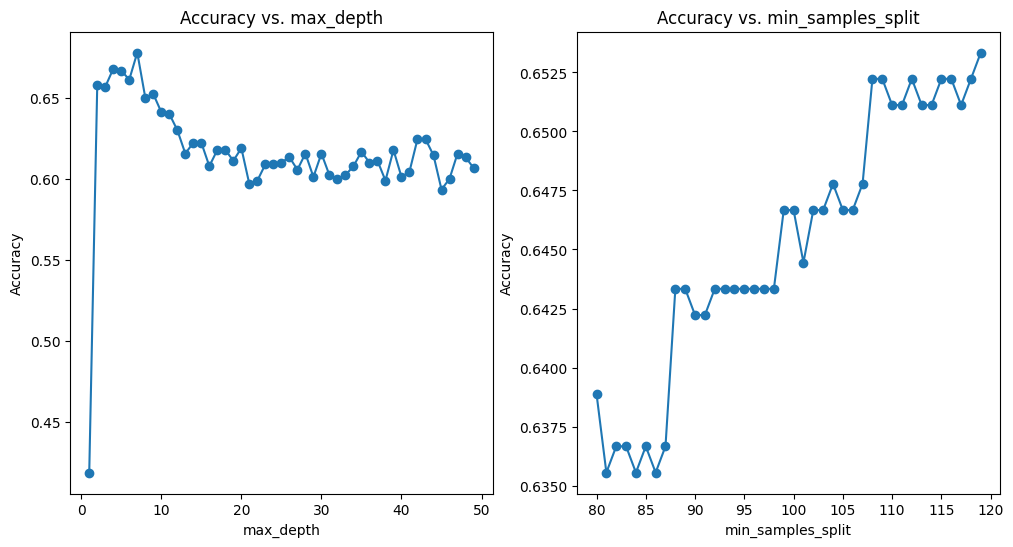

In [20]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)    #split data_set for learning and test

depthes = range(1,50)
depthes_acc = []           #find best max_depth
max_acc_depth = 0

min_samples_split = range(80,120)
min_samples_split_acc = []          #find best min_sample_split
max_acc_split = 0


for i in depthes:
  D_Tree=DecisionTreeClassifier(max_depth=i)    #create instance of D-Tree with specific max_depth
  D_Tree.fit(x_train, y_train)                  #train the model
  accuracy = D_Tree.score(x_test,y_test)        #count accuracy
  depthes_acc.append(accuracy)                  #add accuracy to list

for i in min_samples_split:
  D_Tree=DecisionTreeClassifier(min_samples_split=i)  #create instance of D-Tree with min_samples_split
  D_Tree.fit(x_train, y_train)                        #train the model
  accuracy = D_Tree.score(x_test,y_test)              #count accuracy
  min_samples_split_acc.append(accuracy)              #add accuracy to list


max_acc_depth = max(depthes_acc)
max_acc_split = max(min_samples_split_acc)          # find best accuracy for each hyperparameter



plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(depthes, depthes_acc, marker='o')
plt.title('Accuracy vs. max_depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(min_samples_split, min_samples_split_acc,  marker='o')
plt.title('Accuracy vs. min_samples_split')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')




plt.show()


In [43]:
D_Tree = DecisionTreeClassifier()   #create instance of D-Tree
train_sizes, train_accuracy, validation_accuracy = learning_curve(       #return The sizes of training sets uses in cross-validation  and  The training scores at each training size  and The cross-validated validation scores at each training size
estimator = D_Tree,
X = x,
y = y,
train_sizes = [0.25, 0.5, 0.75, 1],   #training percent
cv = 8,                                 #split training data to 8 parts and train 8 times (validation)
scoring = 'accuracy')

#return a matrix of train_seize and cv accuracy

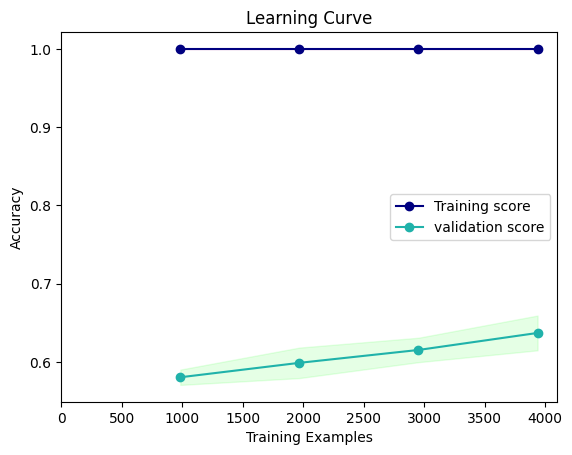

In [45]:
train_mean = np.mean(train_accuracy, axis=1)  #count the mean of each row(each training size   0.25 0.5 ...)
train_enheraf = np.std(train_accuracy, axis=1)    #count the standard_deviation of each row(each training size 0.25 0.5 ...)               #act on training set
test_mean = np.mean(validation_accuracy, axis=1) #count the mean of each row(each training size   0.25 0.5 ...)
test_enheraf = np.std(validation_accuracy, axis=1)   #count the standard_deviation of each row(each training size 0.25 0.5 ...)            #act on validation set


plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")

up = train_mean + train_enheraf
down = train_mean - train_enheraf

plt.plot(train_sizes, train_mean, marker='o', color="navy", label="Training score")

plt.fill_between(train_sizes, down , up , alpha=0.1, color="deeppink")  #enheraf meyar atraf khat



up = test_mean + test_enheraf
down = test_mean - test_enheraf

plt.plot(train_sizes, test_mean, marker='o', color="lightseagreen", label="validation score")

plt.fill_between(train_sizes,down,up, alpha=0.1, color="lime")     #enheraf meyar atraf khat


plt.legend()
plt.xlim(0, 4100)
plt.show()
